In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re

In [28]:
# upload csv Data.  All data from Kaggle.com(https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv)
# https://www.kaggle.com/datasets/bahadirumutiscimen/cancer-death-rates-in-the-world-19902019

cancer_path = "Resources/total-cancer-deaths-by-type.csv"
econ_path = "Resources/WorldSustainabilityDataset.csv"

# Upload Raw Kaggle Data
cancer_df = pd.read_csv(cancer_path)
econ_df = pd.read_csv(econ_path)

In [29]:
cancer_df.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


In [30]:
econ_df.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [31]:
#  Create list of countries from each dataset

cancer_list= cancer_df["Entity"].unique()
econ_list = econ_df["Country Name"].unique()

In [32]:
# Count identical countries in each dataset
country_count = []

for x in cancer_list:
    if x in econ_list:
        country_count.append(x)
        
print(len(country_count))

149


In [33]:
# Print list of matching countries
country_count

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Les

In [34]:
# Merge Dataframes on country and year "inner" into new cancer_merge_df

cancer_merge_df = pd.merge(cancer_df, econ_df, how="inner", left_on=["Entity","Year"], right_on=["Country Name","Year"], copy=False)

In [35]:
# Review new data frame
cancer_merge_df.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Albania,ALB,2000,316,40,31,748,70,26,23,...,NaN,Lower-middle income,NaN,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,ALB,2001,301,42,31,734,68,26,21,...,NaN,Lower-middle income,0.325798,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,ALB,2002,295,47,34,765,72,28,21,...,31.7,Lower-middle income,0.390081,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,ALB,2003,290,53,37,806,77,30,21,...,NaN,Lower-middle income,0.971900,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,ALB,2004,272,57,39,817,77,31,21,...,NaN,Lower-middle income,2.420388,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [36]:
# View column names
cancer_merge_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All A

In [37]:
# Creat keep list of columns from group for first review

keep = ['Entity','Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number)',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
       'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS',
       'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
       'Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS',
       'GDP (current US$) - NY.GDP.MKTP.CD','Continent',
       'General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS',
       'Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG',
       'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
       'Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Income Classification (World Bank Definition)',
       'Life expectancy at birth, total (years) - SP.DYN.LE00.IN',
       'Population, total - SP.POP.TOTL',
       'Regime Type (RoW Measure Definition)',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS',
       'Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS',
       'Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
       'World Regions (UN SDG Definition)']

In [38]:
# Create new df to hold kept columns
cancer_clean_df = cancer_merge_df[keep]

cancer_clean_df.head()

,Entity,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Breast cancer - Sex: Both - Age: All Ages (Number),Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number),Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number),...,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Albania,2000,316,40,748,23,125,162,192,14,...,NaN,3.004,Lower-middle income,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,NaN,3.221,Lower-middle income,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,NaN,3.748,Lower-middle income,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,NaN,4.232,Lower-middle income,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,NaN,4.104,Lower-middle income,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [39]:
# CReate list of for new df columns

kept_list = cancer_clean_df.columns


In [40]:
# Check null values and print column and % of null values remaining in dataset

for name in kept_list:
    null = cancer_clean_df[name].isnull().sum(axis=0)
    perc_null = (null/2831)*100
    print(f'{name} has {perc_null} nulls')

Entity has 0.0 nulls
Year has 0.0 nulls
Deaths - Liver cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Leukemia - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Breast cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Non-Hodgkin lymphoma - Sex: B

In [41]:
# Make a new dataframe comparing countries to high null % columns

check_nulls = cancer_clean_df[['Entity','Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']]

check_nulls.head()

,Entity,Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1
0,Albania,NaN,NaN
1,Albania,4.9,NaN
2,Albania,6.1,NaN
3,Albania,7.5,NaN
4,Albania,8.6,NaN


C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


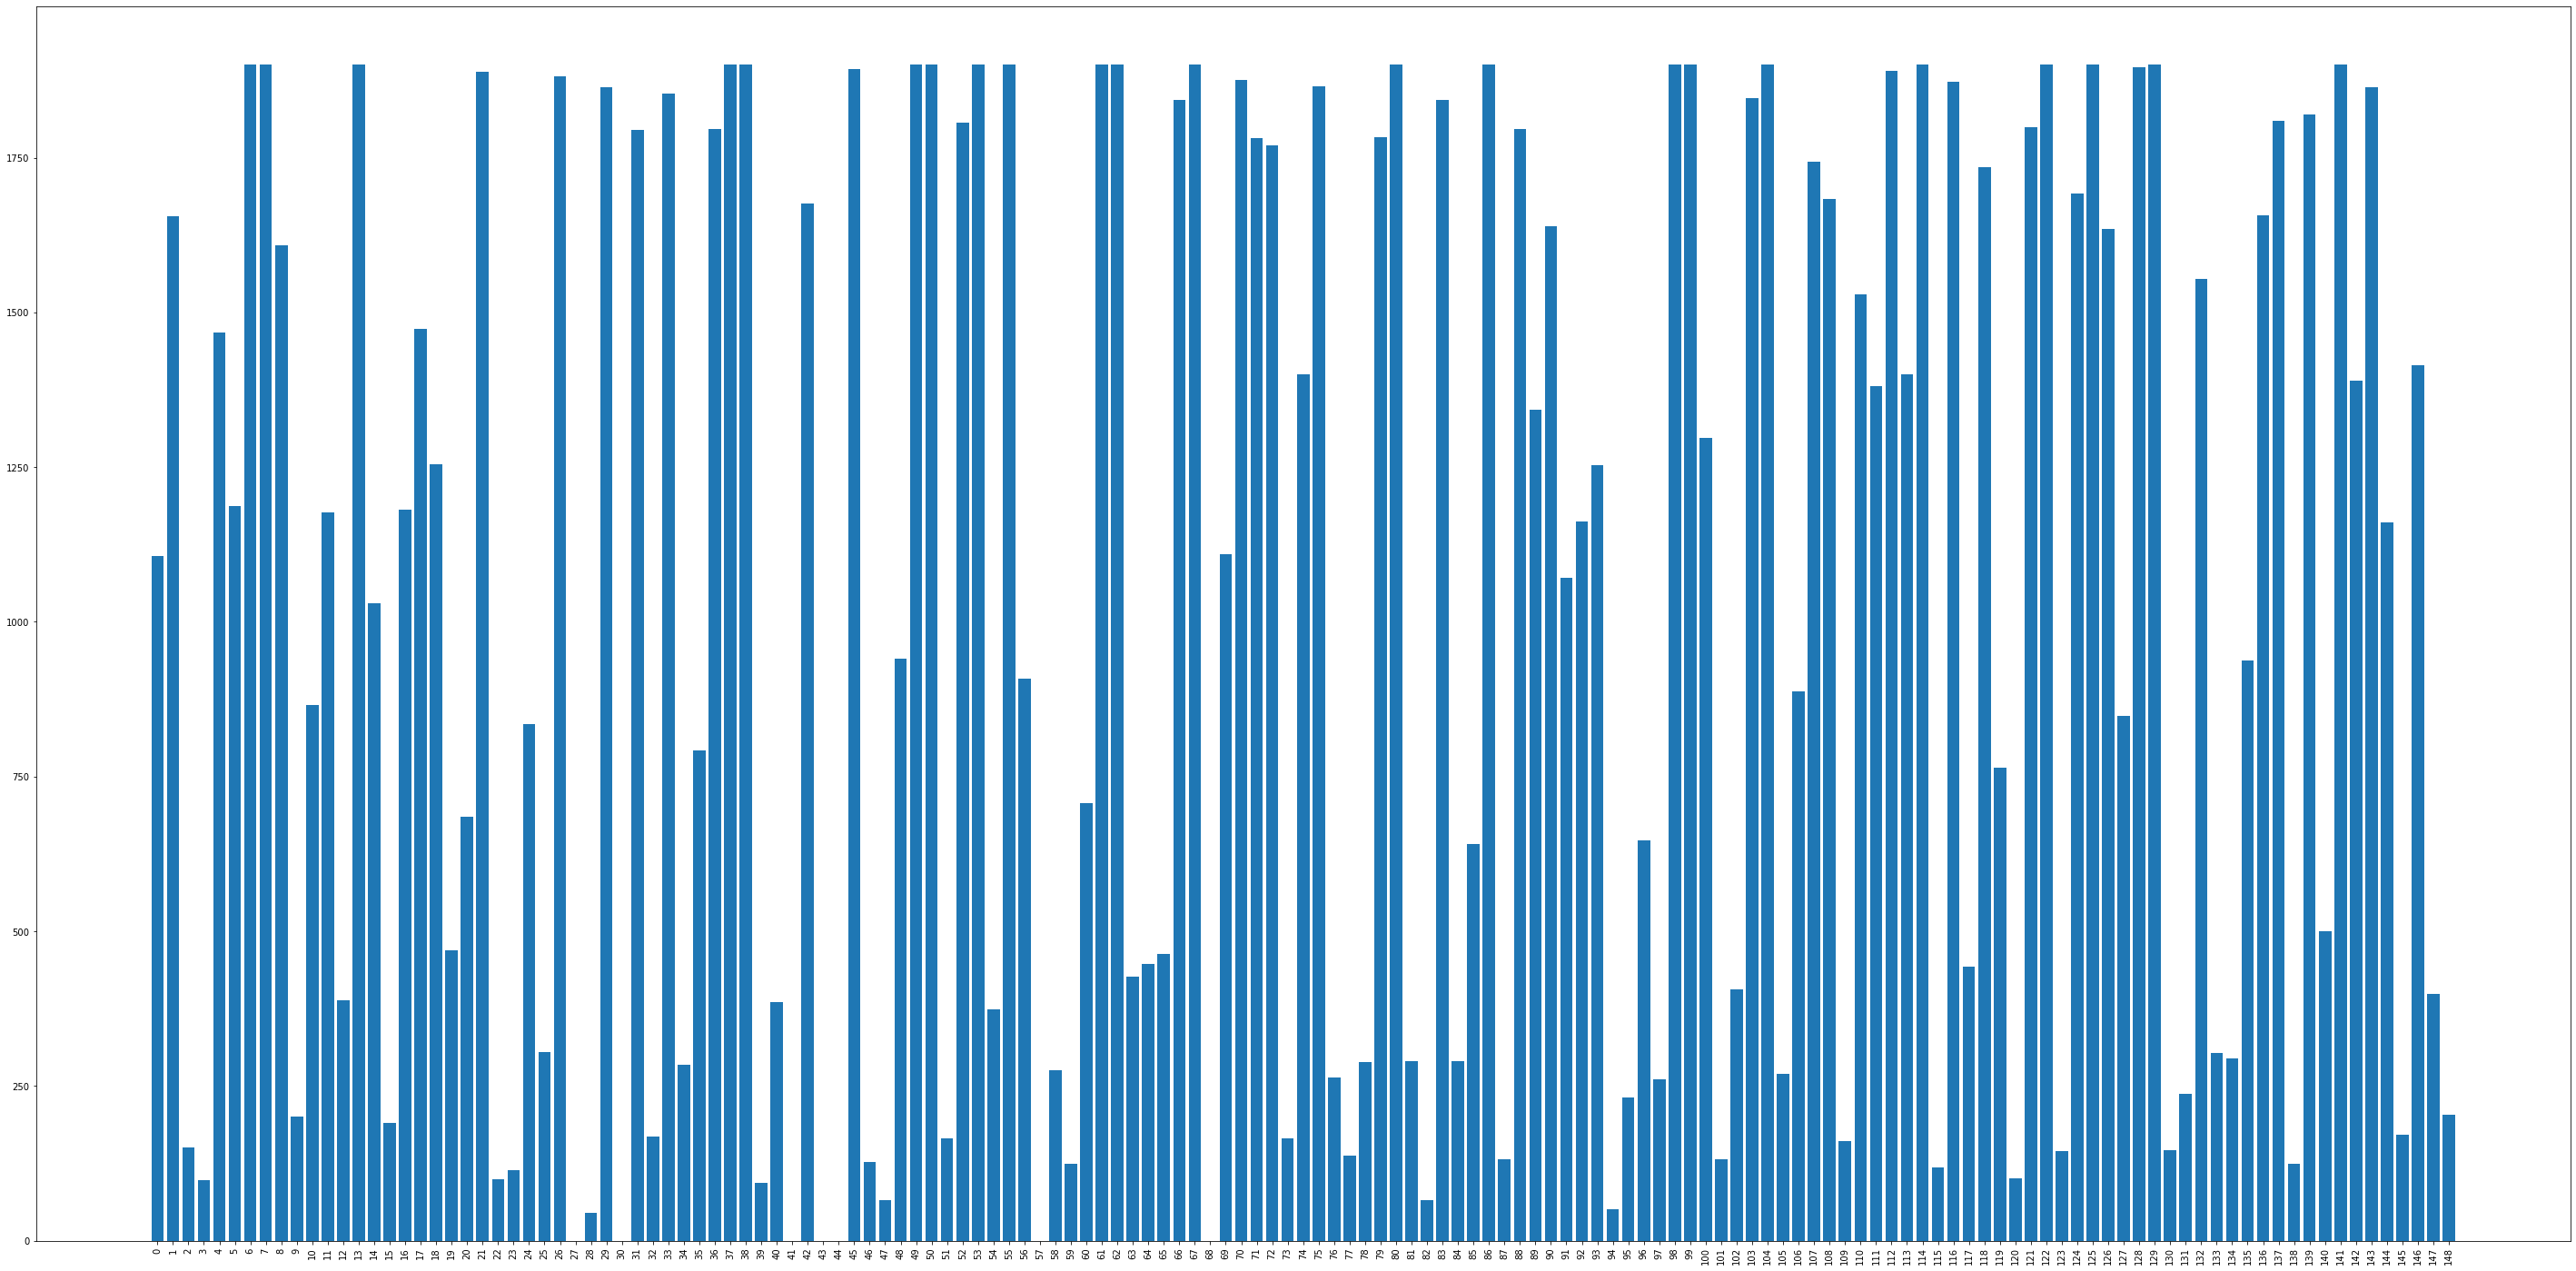

In [42]:
# Check water column for null data totals 41% of data is Null

country = check_nulls.groupby(check_nulls['Entity']).sum()
country.reset_index(inplace=True)
x = country['Entity'].tolist()
y = country['Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


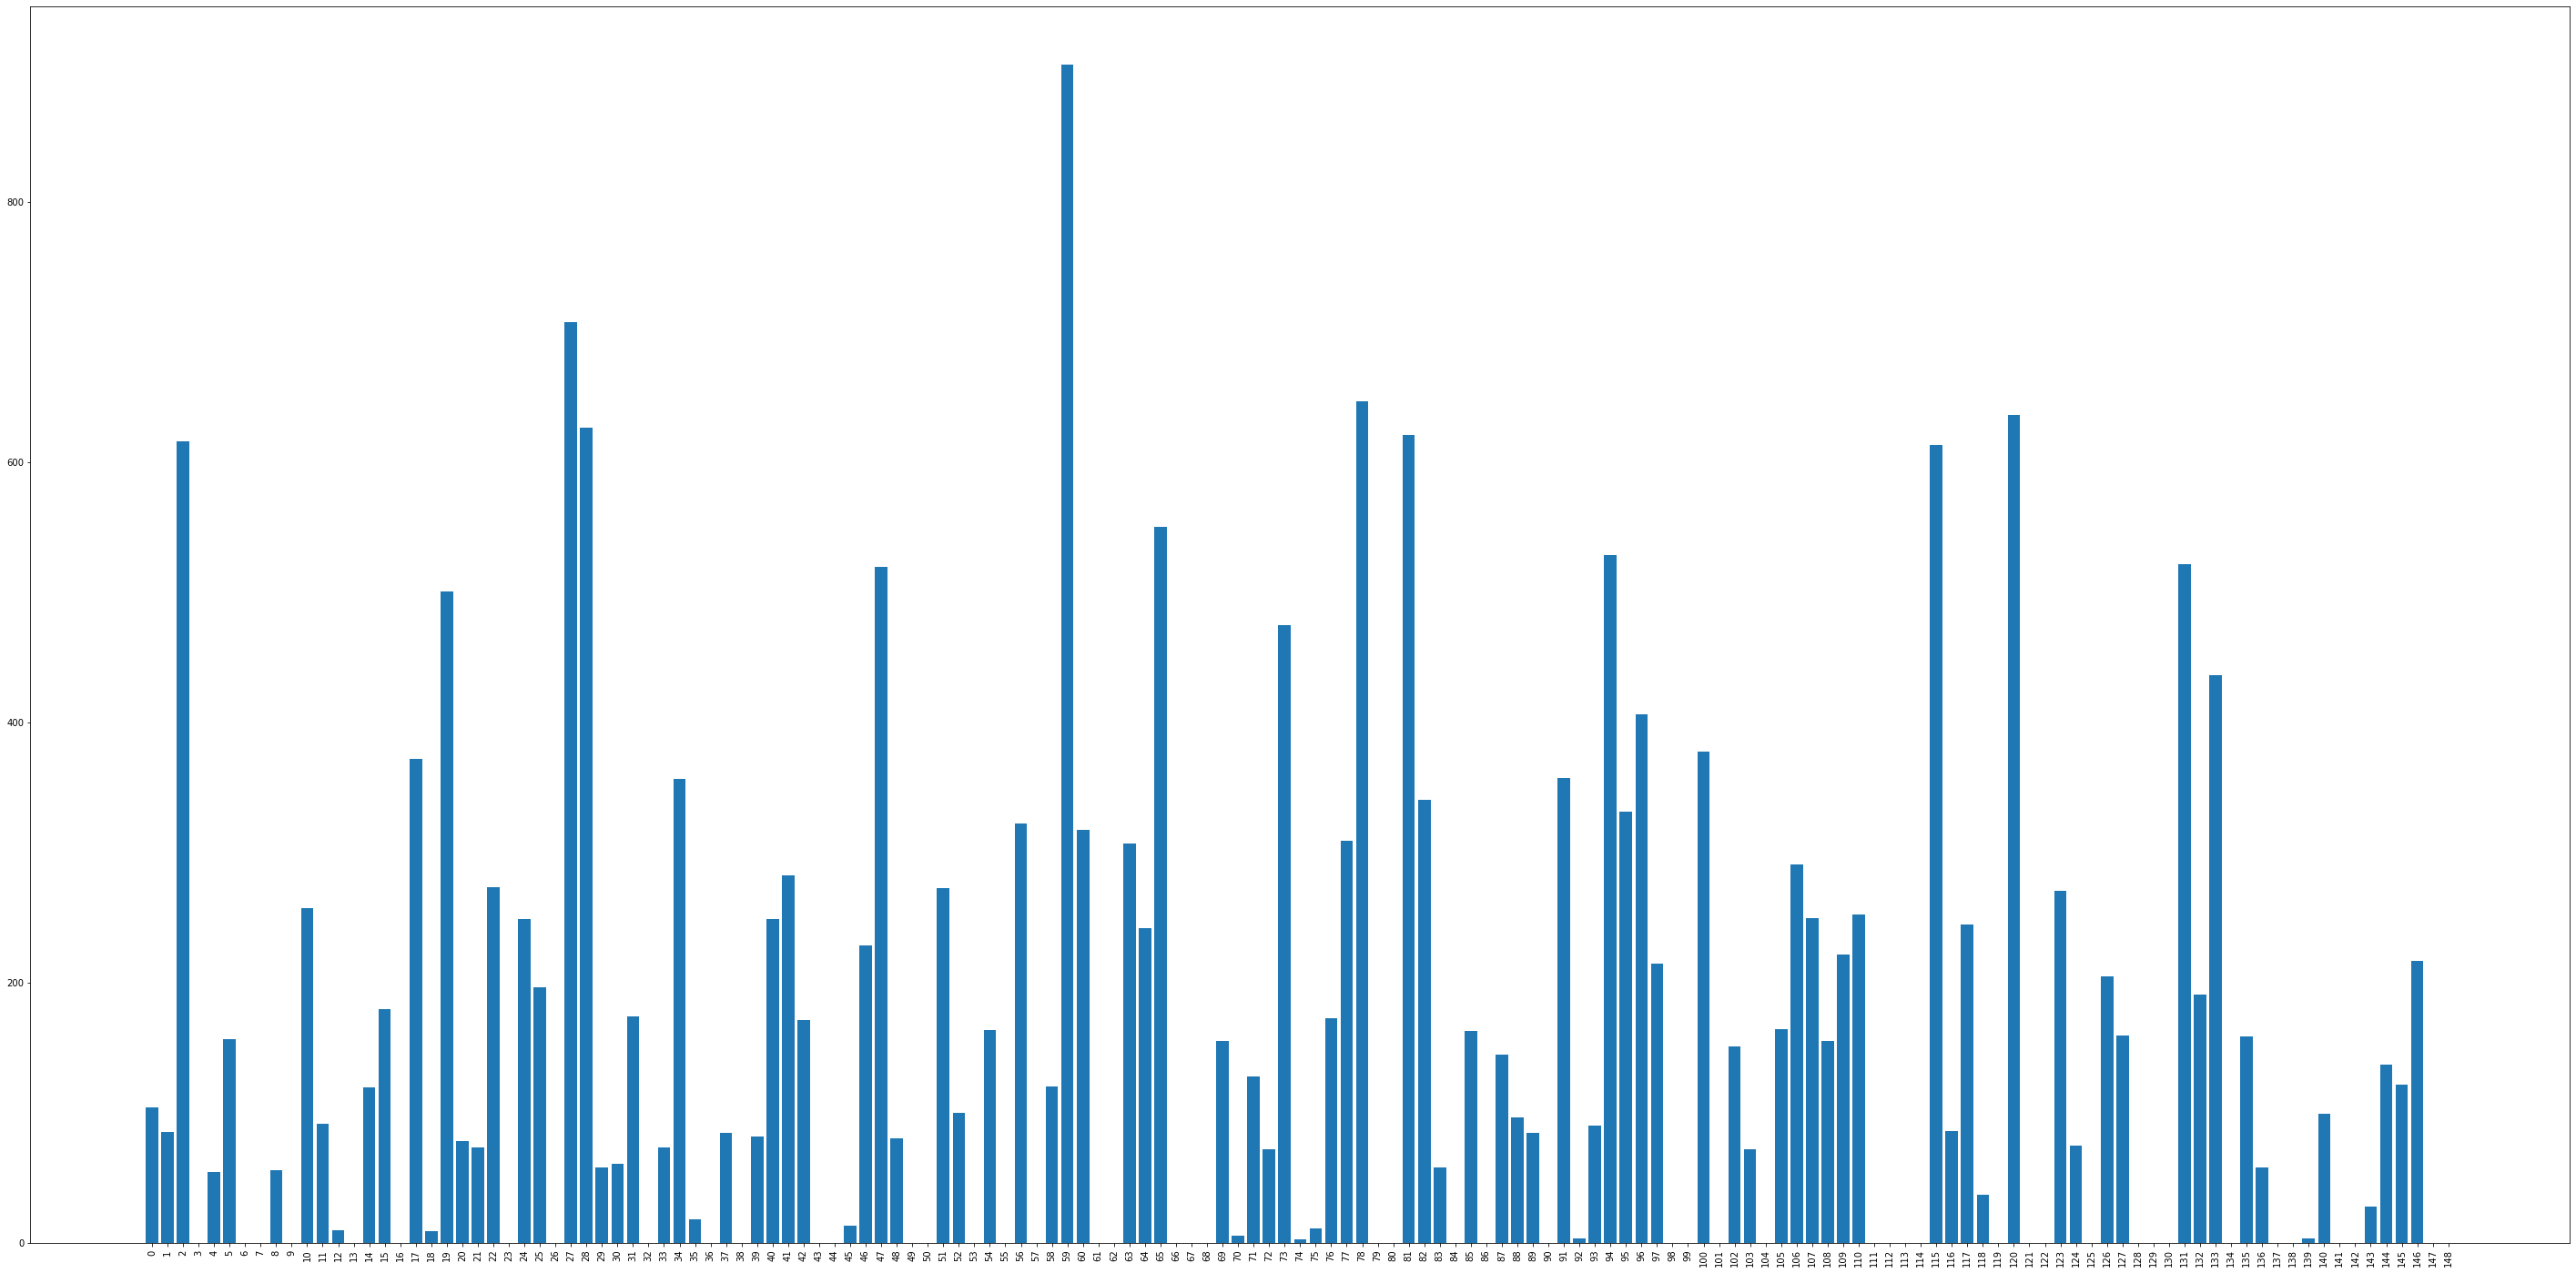

In [43]:
# Check undernourishment column for data amounts  44%  of data is Null

x = country['Entity'].tolist()
y = country['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

In [44]:
# Delete Columns with insufficient Data

eco_cancer_data = cancer_clean_df.drop(columns=['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
                                  'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
                                  'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1'], axis=1)
# Create list of final columns
final_column = eco_cancer_data.columns

eco_cancer_data.shape

(2831, 37)

In [45]:
# Rename columns to more manageable lengths

# Create list of new column names

rename = ['Country', 'Year',
       'Liver cancer',
       'Kidney cancer',
       'Tracheal, bronchus, and lung cancer',
       'Malignant skin melanoma',
       'Leukemia',
       'Breast cancer',
       'Prostate cancer',
       'Thyroid cancer',
       'Bladder cancer',
       'Uterine cancer',
       'Ovarian cancer',
       'Cervical cancer',
       'Non-Hodgkin lymphoma',
       'Pancreatic cancer',
       'Colon and rectum cancer',
       'Access to electricity (% of population)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Adjusted savings: particulate emission damage (% of GNI)',
       'Final consumption expenditure (% of GDP)',
       'GDP (current US$)', 'Continent',
       'General government final consumption expenditure (% of GDP)',
       'Inflation (annual %)',
       'Renewable energy consumption',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Income Classification (World Bank Definition)',
       'Life expectancy at birth, total (years)',
       'Population',
       'Regime Type (RoW Measure Definition)',
       'Rural population (% of total population)',
       'Total natural resources rents (% of GDP)',
       'Urban population (% of total population)',
       'World Regions']

# Create dictionary of new and old column names
dictionary = dict(zip(final_column, rename))

# Rename columns
eco_cancer_data.rename(columns=dictionary, inplace=True)

# Check Column Names
eco_cancer_data.head()

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,Albania,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,Lower-middle income,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,Lower-middle income,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,Lower-middle income,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,Lower-middle income,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,Lower-middle income,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [46]:
# Clean data for mock up ml unsupervised pca
eco_cancer_data_ml = eco_cancer_data.dropna()

eco_cancer_data_ml.shape

(2234, 37)

In [50]:
# Keep Country Names
country_name_df = pd.DataFrame(eco_cancer_data_ml['Country'])

eco_cancer_data_ml.drop(columns = ['Country',"World Regions","Continent"], axis=1, inplace=True)
eco_cancer_data_ml.head()

C:\Users\Big Pappa J\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,Bladder cancer,...,Inflation (annual %),Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population)
1,2001,301,42,734,21,121,163,195,14,26,...,3.107588,39.125301,3.221,Lower-middle income,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435
2,2002,295,47,765,21,124,175,206,14,28,...,7.770526,35.895802,3.748,Lower-middle income,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501
3,2003,290,53,806,21,129,191,219,15,30,...,0.484003,33.751701,4.232,Lower-middle income,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573
4,2004,272,57,817,21,132,198,227,15,31,...,2.280019,35.934700,4.104,Lower-middle income,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651
5,2005,246,60,804,20,131,208,230,15,31,...,2.366582,36.868301,4.199,Lower-middle income,75.228,3011487.0,Electoral Democracy,53.269,1.018382,46.731


In [51]:
eco_cancer_data_ml.dtypes

Year                                                                                       int64
Liver cancer                                                                               int64
Kidney cancer                                                                              int64
Tracheal, bronchus, and lung cancer                                                        int64
Malignant skin melanoma                                                                    int64
Leukemia                                                                                   int64
Breast cancer                                                                              int64
Prostate cancer                                                                            int64
Thyroid cancer                                                                             int64
Bladder cancer                                                                             int64
Uterine cancer                

In [120]:
X = pd.get_dummies(eco_cancer_data_ml, columns=["Income Classification (World Bank Definition)","Regime Type (RoW Measure Definition)"])
print(X.shape)
X.head(10)

(2234, 40)


,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,Bladder cancer,...,Total natural resources rents (% of GDP),Urban population (% of total population),Income Classification (World Bank Definition)_High income,Income Classification (World Bank Definition)_Low income,Income Classification (World Bank Definition)_Lower-middle income,Income Classification (World Bank Definition)_Upper-middle income,Regime Type (RoW Measure Definition)_Closed Autocracy,Regime Type (RoW Measure Definition)_Electoral Autocracy,Regime Type (RoW Measure Definition)_Electoral Democracy,Regime Type (RoW Measure Definition)_Liberal Democracy
1,2001,301,42,734,21,121,163,195,14,26,...,0.755950,42.435,0,0,1,0,0,1,0,0
2,2002,295,47,765,21,124,175,206,14,28,...,0.760798,43.501,0,0,1,0,0,1,0,0
3,2003,290,53,806,21,129,191,219,15,30,...,0.733194,44.573,0,0,1,0,0,1,0,0
4,2004,272,57,817,21,132,198,227,15,31,...,0.770849,45.651,0,0,1,0,0,1,0,0
5,2005,246,60,804,20,131,208,230,15,31,...,1.018382,46.731,0,0,1,0,0,0,1,0
6,2006,224,61,780,20,126,210,229,14,31,...,1.321831,47.815,0,0,1,0,0,0,1,0
7,2007,211,63,768,20,122,209,233,13,31,...,1.761086,48.902,0,0,1,0,0,0,1,0
8,2008,208,66,796,20,125,219,245,13,32,...,1.109999,49.991,0,0,1,0,0,0,1,0
9,2009,207,67,809,21,126,220,256,14,33,...,0.605980,51.076,0,0,0,1,0,0,1,0
10,2010,214,67,826,22,127,225,269,14,34,...,1.574506,52.163,0,0,0,1,0,0,1,0


In [184]:
cancer_list=['Liver cancer', 'Kidney cancer',
       'Tracheal, bronchus, and lung cancer', 'Malignant skin melanoma',
       'Leukemia', 'Breast cancer', 'Prostate cancer', 'Thyroid cancer',
       'Bladder cancer', 'Uterine cancer', 'Ovarian cancer', 'Cervical cancer',
       'Non-Hodgkin lymphoma', 'Pancreatic cancer', 'Colon and rectum cancer']

for x in cancer_list:
    X[x]=X[x]/X["Population"]

temp_list=[]
df_list ={}
keys = []
for name in cancer_list:
    temp_list = cancer_list
    temp_list = [x for x in cancer_list if x != name]
    k= (f'X_{name}')
    keys.append(k)
    df_list[k]=X.drop(columns = temp_list, axis=1)
        
for dict in df_list:
    df_list[dict].drop(columns="Population", axis=1)        
        
df_list['X_Liver cancer']

,Year,Liver cancer,Access to electricity (% of population),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: particulate emission damage (% of GNI),Final consumption expenditure (% of GDP),GDP (current US$),General government final consumption expenditure (% of GDP),...,Total natural resources rents (% of GDP),Urban population (% of total population),Income Classification (World Bank Definition)_High income,Income Classification (World Bank Definition)_Low income,Income Classification (World Bank Definition)_Lower-middle income,Income Classification (World Bank Definition)_Upper-middle income,Regime Type (RoW Measure Definition)_Closed Autocracy,Regime Type (RoW Measure Definition)_Electoral Autocracy,Regime Type (RoW Measure Definition)_Electoral Democracy,Regime Type (RoW Measure Definition)_Liberal Democracy
1,2001,3.432279e-24,100.000000,1.534561,0.214370,0.0,0.381428,88.835577,3.922099e+09,10.625987,...,0.755950,42.435,0,0,1,0,0,1,0,0
2,2002,3.404454e-24,100.000000,1.688402,0.229341,0.0,0.366751,91.369736,4.348070e+09,11.335078,...,0.760798,43.501,0,0,1,0,0,1,0,0
3,2003,3.397216e-24,100.000000,1.556741,0.230807,0.0,0.354888,91.428906,5.611492e+09,11.098397,...,0.733194,44.573,0,0,1,0,0,1,0,0
4,2004,3.240069e-24,100.000000,1.248493,0.248708,0.0,0.333259,88.415250,7.184681e+09,11.205908,...,0.770849,45.651,0,0,1,0,0,1,0,0
5,2005,2.990964e-24,100.000000,1.200393,0.353888,0.0,0.308829,87.976668,8.052076e+09,11.031218,...,1.018382,46.731,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2014,2.732074e-26,32.300000,2.310859,1.573499,0.0,1.426705,103.172100,1.949552e+10,19.560283,...,5.531514,32.504,0,1,0,0,0,1,0,0
2827,2015,2.602854e-26,33.700000,2.381654,0.844003,0.0,1.492774,108.392819,1.996312e+10,18.877513,...,4.561981,32.385,0,1,0,0,0,1,0,0
2828,2016,2.492898e-26,39.676228,2.101249,0.823740,0.0,1.496494,101.470591,2.054868e+10,18.123938,...,4.473632,32.296,0,1,0,0,0,1,0,0
2829,2017,2.390488e-26,40.144283,2.102515,1.300127,0.0,1.422511,93.411534,1.901533e+10,20.022695,...,4.844665,32.237,0,1,0,0,0,1,0,0


In [181]:
pca_dfs = ['X_Liver', 'X_Kidney', 'X_Tracheal', 'X_melanoma', 'X_Leukemia',
           'X_Breast', 'X_Prostate', 'X_Thyroid', 'X_Bladder', 'X_Uterine', 'X_Ovarian',
           'X_Cervical', 'X_Non-Hodgkin', 'X_Pancreatic', 'X_Colon']


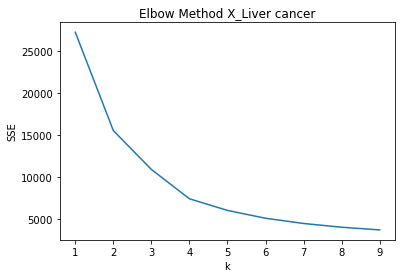

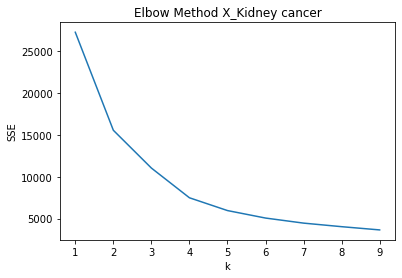

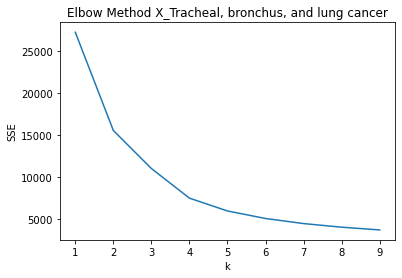

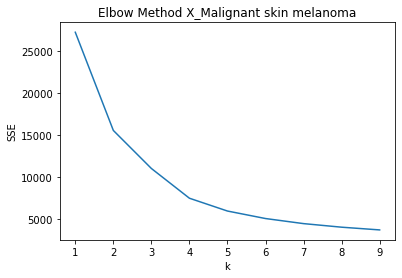

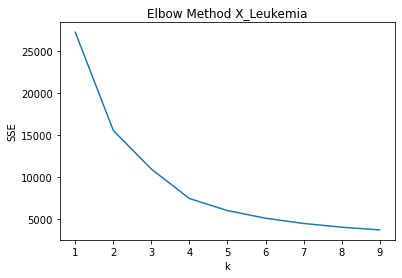

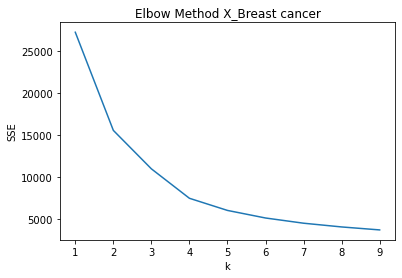

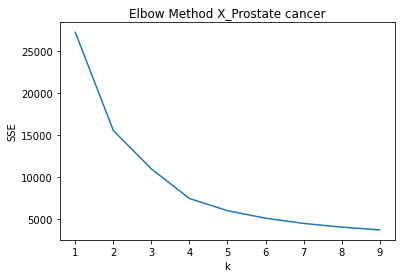

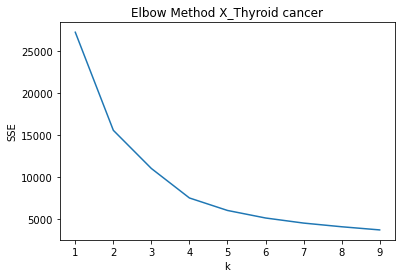

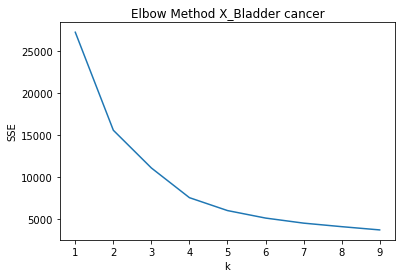

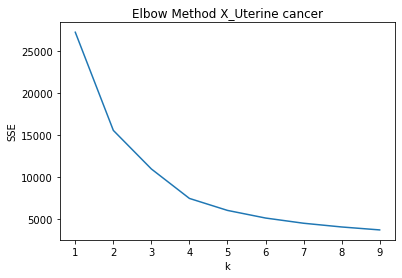

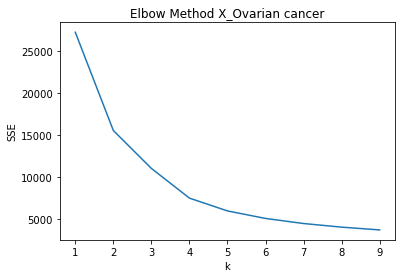

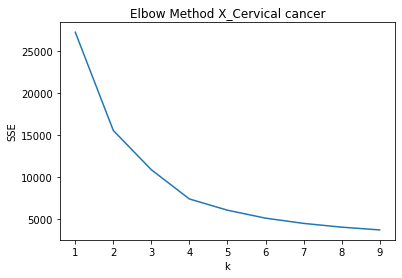

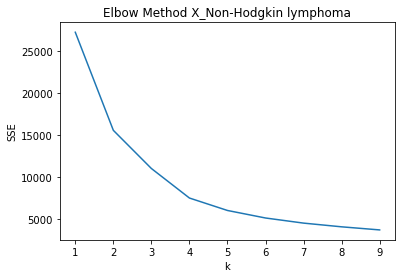

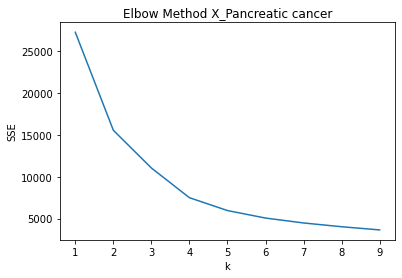

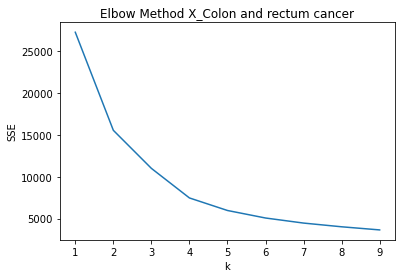

In [188]:
# Create Dictionary of scaled dfs
scaled_dfs = {}

for dict in keys:
    X_scaled = StandardScaler().fit_transform(df_list[dict])
    # Using PCA to reduce dimension to three principal components.
    pca = PCA(n_components=3, random_state=32)
    X_pca = pca.fit_transform(X_scaled)
    pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3"], index = df_list[dict].index)
    # Create an elbow curve to find the best value for K
    sse = {}
    K = range(1,10)
    for k in K:
        kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
        sse[k]= kmeanmodel.inertia_

    # Plot
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title(f'Elbow Method {dict}')
    plt.show()

In [ ]:
# Initialize the K-Means model.

model = KMeans(n_clusters=4, random_state=32)
# Fit the model

model.fit(X_pca)
# Predict clusters

predicted = model.predict(X_pca)
predicted

In [54]:
# Standardize the data with StandardScaler().

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-1.71482379 -0.16612554 -0.34537699 -0.20572924 -0.32260492 -0.29870906
  -0.37217115 -0.40433518 -0.31793555 -0.34338413 -0.3185679  -0.36482574
  -0.3029556  -0.32509826 -0.29141391 -0.28823446  0.69503533 -0.03824041
  -0.51341204 -0.26670012 -0.43647091  0.53829364 -0.27194423 -0.97101019
  -0.25517981  0.11836587 -0.23400184  0.42289308 -0.26936827  0.68494984
  -0.55962087 -0.68494984 -0.63572662 -0.53144518  1.68870487 -0.55011263
  -0.34368317  1.59035402 -0.7052085  -0.6218652 ]
 [-1.52004464 -0.16651906 -0.34328576 -0.20515532 -0.32260492 -0.29824714
  -0.37097989 -0.40253052 -0.31793555 -0.34282051 -0.31729771 -0.36377495
  -0.30238434 -0.3246321  -0.28994614 -0.28753022  0.69503533  0.06209625
  -0.51097761 -0.26670012 -0.45040166  0.69196217 -0.27168718 -0.83578551
   0.42510237  0.00806783 -0.23340954  0.45386642 -0.26942383  0.63726777
  -0.55914182 -0.63726777 -0.63572662 -0.53144518  1.68870487 -0.55011263
  -0.34368317  1.59035402 -0.7052085  -0.6218652 ]
 [-1.32526

In [56]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=3, random_state=32)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.34355749,  0.47395748,  0.03415429],
       [-1.34352734,  0.45792508,  0.13289697],
       [-1.30584047,  0.28826953, -0.02785351],
       ...,
       [-1.58504626,  2.94813221, -1.36158472],
       [-1.55153219,  2.81874665, -1.14460156],
       [-1.48265391,  2.77173011, -0.28521092]])

In [57]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3"], index = eco_cancer_data_ml.index)
print(pcs_df.shape)
pcs_df.head(10)

(2234, 3)


,PC 1,PC 2,PC 3
1,-1.343557,0.473957,0.034154
2,-1.343527,0.457925,0.132897
3,-1.305840,0.288270,-0.027854
4,-1.303552,0.251858,-0.008955
5,-1.236340,-0.011186,-0.203594
6,-1.223191,-0.100708,-0.179063
7,-1.234192,-0.102491,-0.243343
8,-1.234622,-0.100923,-0.315419
9,-1.201960,-0.542023,-0.285938
10,-1.165449,-0.703219,-0.270856


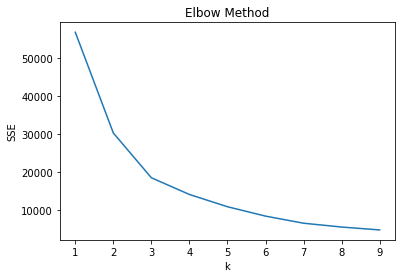

In [58]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
from matplotlib import pyplot as plt

sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [65]:
# Initialize the K-Means model.

model = KMeans(n_clusters=3, random_state=32)
# Fit the model

model.fit(X_pca)
# Predict clusters

predicted = model.predict(X_pca)
predicted

array([0, 0, 0, ..., 2, 2, 2])

In [66]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE
clustered_df = pd.concat([eco_cancer_data_ml, pcs_df], axis=1, join="outer")
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# # YOUR CODE HERE
clustered_df["Country"] = country_name_df["Country"]
# #  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# # YOUR CODE HERE
clustered_df["Class"] = predicted
# # Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(2234, 39)


,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,Bladder cancer,...,Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),PC 1,PC 2,PC 3,Country,Class
1,2001,301,42,734,21,121,163,195,14,26,...,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,-1.343557,0.473957,0.034154,Albania,0
2,2002,295,47,765,21,124,175,206,14,28,...,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,-1.343527,0.457925,0.132897,Albania,0
3,2003,290,53,806,21,129,191,219,15,30,...,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,-1.305840,0.288270,-0.027854,Albania,0
4,2004,272,57,817,21,132,198,227,15,31,...,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,-1.303552,0.251858,-0.008955,Albania,0
5,2005,246,60,804,20,131,208,230,15,31,...,3011487.0,Electoral Democracy,53.269,1.018382,46.731,-1.236340,-0.011186,-0.203594,Albania,0
6,2006,224,61,780,20,126,210,229,14,31,...,2992547.0,Electoral Democracy,52.185,1.321831,47.815,-1.223191,-0.100708,-0.179063,Albania,0
7,2007,211,63,768,20,122,209,233,13,31,...,2970017.0,Electoral Democracy,51.098,1.761086,48.902,-1.234192,-0.102491,-0.243343,Albania,0
8,2008,208,66,796,20,125,219,245,13,32,...,2947314.0,Electoral Democracy,50.009,1.109999,49.991,-1.234622,-0.100923,-0.315419,Albania,0
9,2009,207,67,809,21,126,220,256,14,33,...,2927519.0,Electoral Democracy,48.924,0.605980,51.076,-1.201960,-0.542023,-0.285938,Albania,0
10,2010,214,67,826,22,127,225,269,14,34,...,2913021.0,Electoral Democracy,47.837,1.574506,52.163,-1.165449,-0.703219,-0.270856,Albania,0


In [67]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3", hover_name="Country", 
                    hover_data=["Country"],color="Class", symbol="Class")
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [ ]:
clustered_df